In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# And load in py files
%cd 'drive/My Drive/BoniLabMDR'
%pwd

/content/drive/My Drive/BoniLabMDR


'/content/drive/My Drive/BoniLabMDR'

In [0]:
# External Imports
from plot_helper import mutpair_parse
from constant import ENCODINGDB
import pandas as pd

efficacydf = pd.read_csv('https://github.com/lizhewen/BoniLabMDR/raw/master/ef2020.csv')
efficacydf = efficacydf.set_index('Shortname').iloc[:,1:]

In [0]:
# User Defined Variables
filepath = 'data/mutpair_newcyc_0.txt'
drugsets = ['DHA-PPQ','AS-AQ','AL']
strategy = 'Cycling'

In [0]:
df = mutpair_parse(filepath)
# Convert Genotype Number to Encoding
geno_dict = {}
for i in range(128):
    geno_dict[i] = ENCODINGDB[i]

df['to'] = df['to'].replace(geno_dict)
df['from'] = df['from'].replace(geno_dict)

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


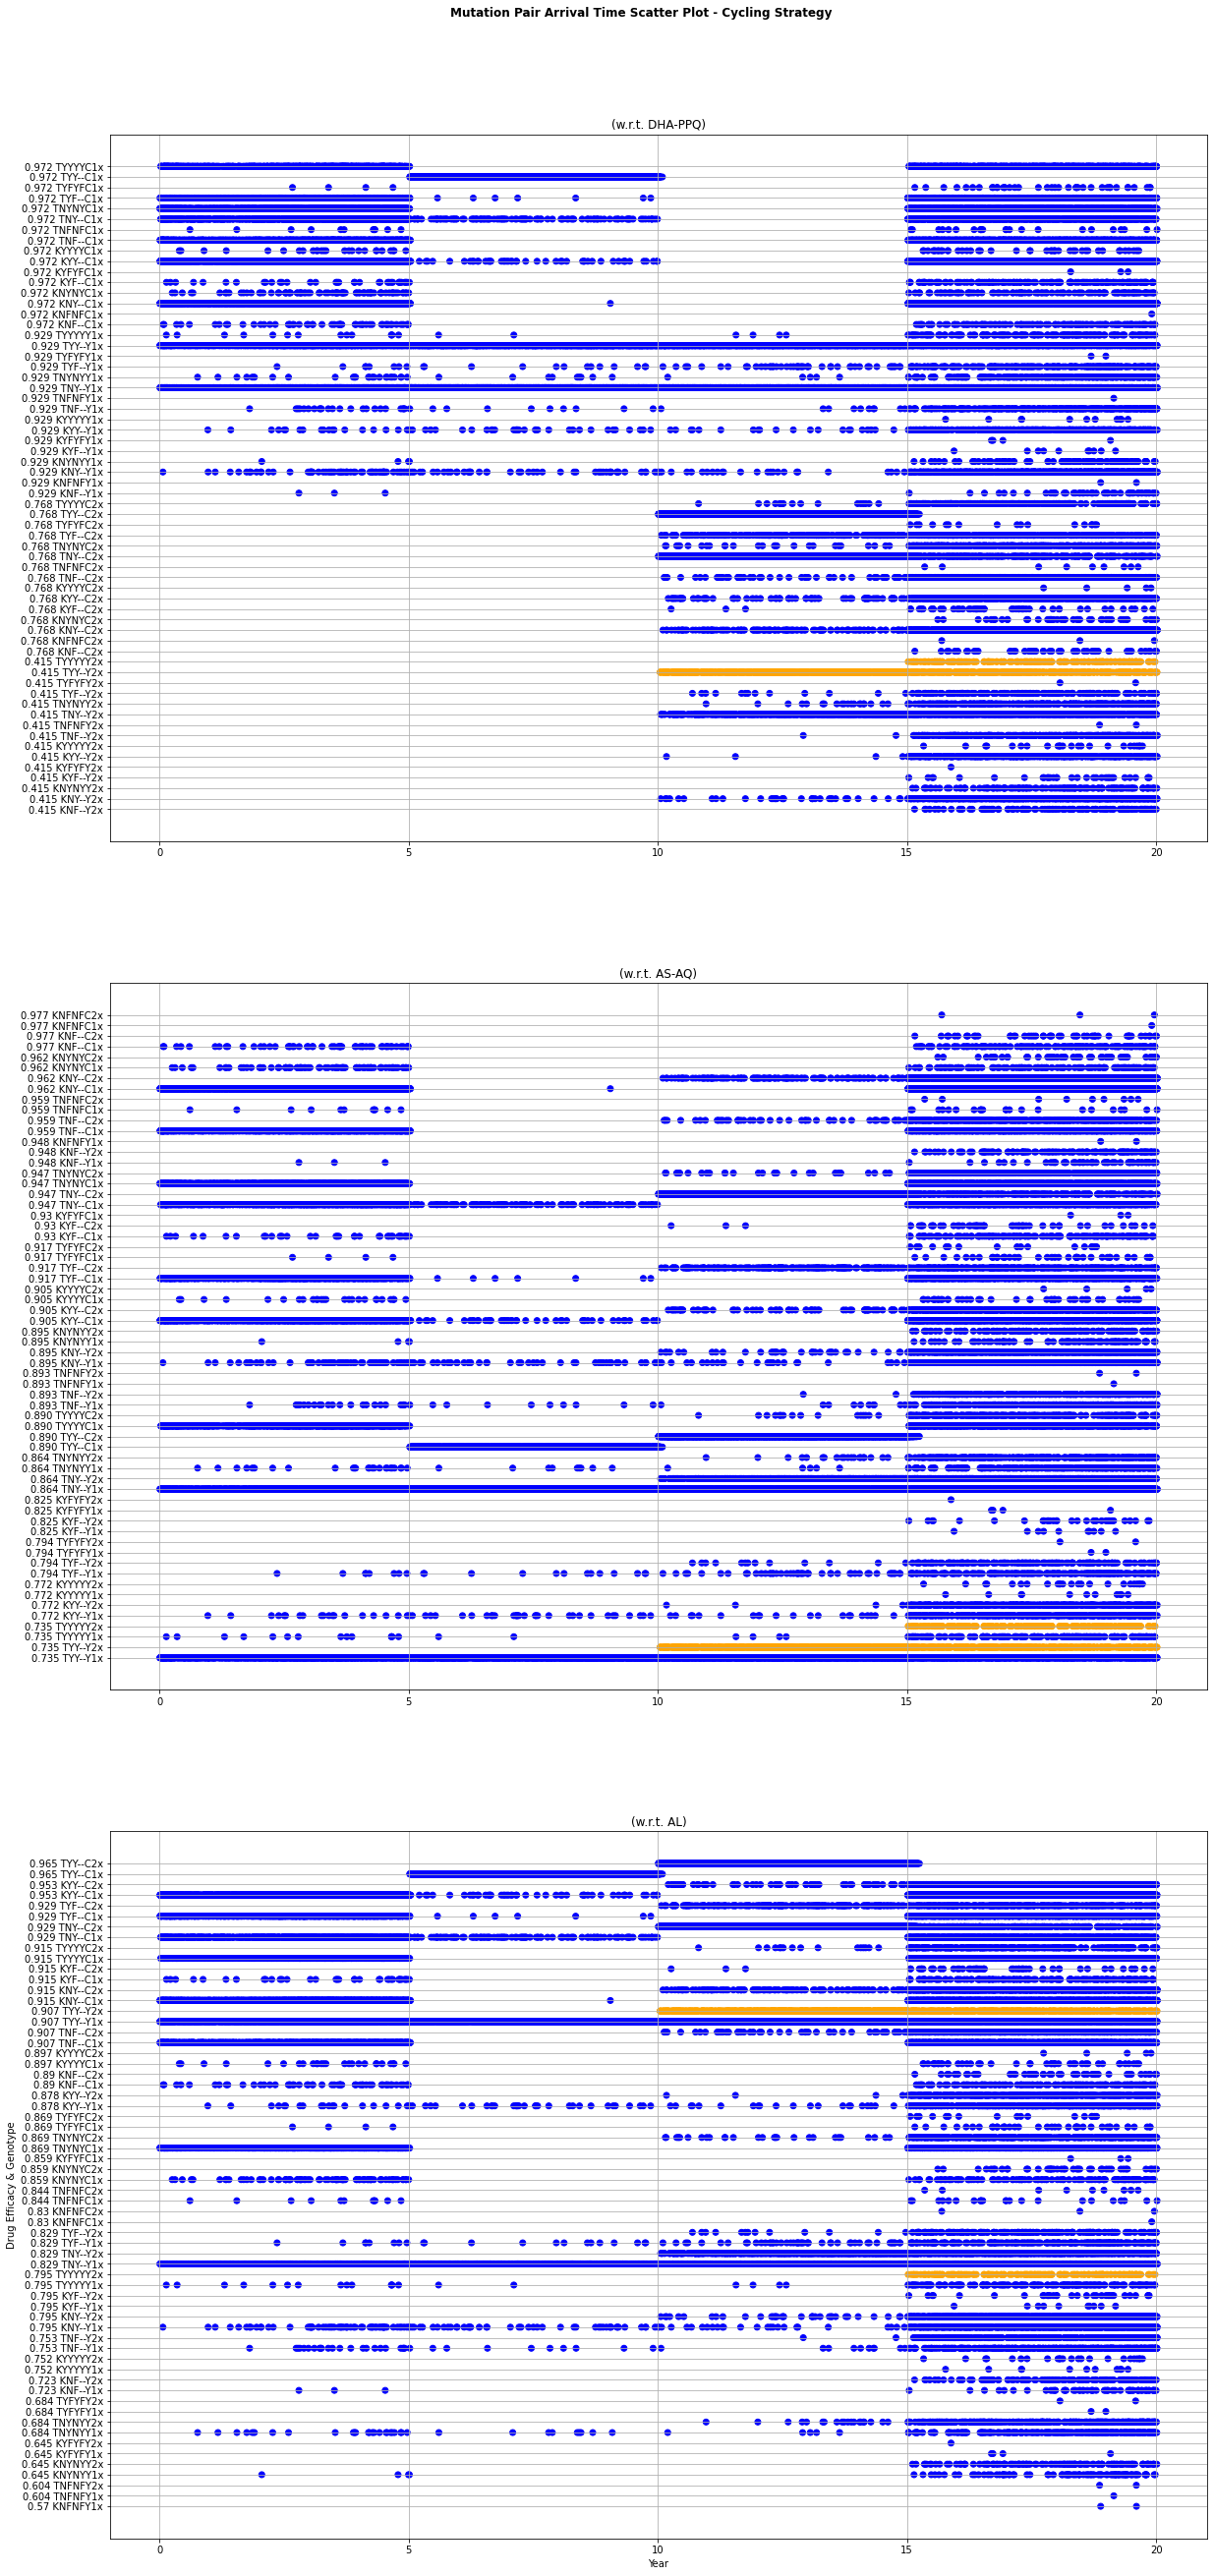

In [6]:
from scatter import mutpair_scatter_plot
mutpair_scatter_plot(df, drugsets, efficacydf, strategy)

In [0]:
from scatter import mutpair_period_count

year_range_by_period = [
                        [10,15], # DHA-PPQ
                        [15,20], # AS-AQ
                        [20,25], # AL
                        [25,30], # DHA-PPQ
]
regex = '^(TYY..Y2.)|(KNFNFY2.)$'

In [8]:
# count all by period
print(mutpair_period_count(year_range_by_period, df))

15296,
7359,
24736,
26391,



In [9]:
# count triple dang by period
print(mutpair_period_count(year_range_by_period, df, regex))

0,
0,
870,
634,



/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
